LOAN PREDICTION MODEL:
    
iN THIS CASE, WE HAVE SOME COLLECTED DATA OF CUSTOMERS WHO APPLIED FOR LOAN AND FROM THIS DATA, WE NEED TO MAKE MODEL WHICH CAN PREDICT THAT WILL CUSTOMER GET LOAN APPROVEL OF NOT FOR FUTURE REFERENCE

IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import random
from sklearn.preprocessing import LabelEncoder
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

LOAD THE DATASET

In [2]:
df = pd.read_csv('loan.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.shape

(614, 13)

In [4]:
df.drop(['Loan_ID'], inplace = True, axis = 1)
# AS WE KNOW THAT LOAN ID IS UNIQUE VALUE AND IT IS NOT EFFECTIVE IN LOAN PREDICTION

In [5]:
df.isnull().sum()
#CHECKING FOR NULL VALUES IN DATA

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
categorical_df=[j for j in df if df[j].dtype == 'object']

for i in categorical_df:
    columns = df[i].unique()
    print(i,columns)
    
#ALL CATAGORICAL DATA AND UNIQUE VALUE

Gender ['Male' 'Female' nan]
Married ['No' 'Yes' nan]
Dependents ['0' '1' '2' '3+' nan]
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes' nan]
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']


In [7]:
null_data = df[df['Gender'].isnull()]
null_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


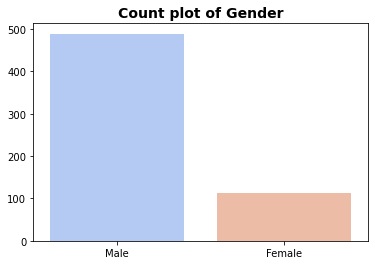

In [8]:
fig = sns.barplot(df['Gender'].value_counts().index,df['Gender'].value_counts().values, palette='coolwarm')
fig.set_title('Count plot of Gender', fontsize=14, fontweight='bold')
plt.show()

HERE, WE CAN VISULIZE THAT NUMBER OF MALE APPLICANT IS HIGHER THEN FEMALE

In [9]:
nan = df['Gender'].isna()
length = sum(nan)
replacement = random.choices(['Male','Female'], weights=[.7, .3], k=length)
df.loc[nan,'Gender'] = replacement

print(df['Gender'].describe())

count      614
unique       2
top       Male
freq       499
Name: Gender, dtype: object


#HERE, WE FILL NULL VALUES WITH RANDOM OPTION WITH 70:30 RATTO

In [10]:
null_data = df[df['Married'].isnull()]
null_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


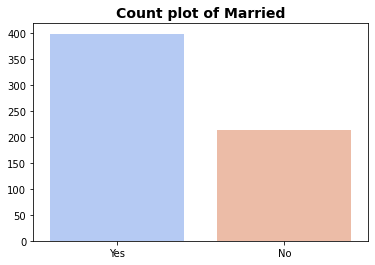

In [11]:
fig = sns.barplot(df['Married'].value_counts().index,df['Married'].value_counts().values, palette='coolwarm')
fig.set_title('Count plot of Married', fontsize=14, fontweight='bold')
plt.show()

MARRIED OR UNMARRIED RATIO IS NEARLY TO 66:34

In [12]:
nan = df['Married'].isna()
length = sum(nan)
replacement = random.choices(['Yes','No'], weights=[.66,.33], k=length)
df.loc[nan,'Married'] = replacement

print(df['Married'].describe())


count     614
unique      2
top       Yes
freq      400
Name: Married, dtype: object


fill null values in married column with 66:33 ratio

In [13]:
null_data = df[df['Dependents'].isnull()]
null_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,Male,No,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


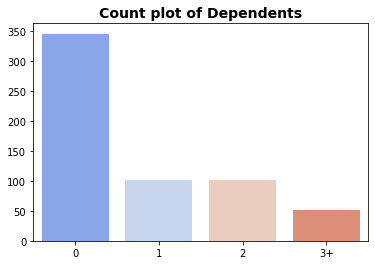

In [14]:
fig = sns.barplot(df['Dependents'].value_counts().index,df['Dependents'].value_counts().values, palette='coolwarm')
fig.set_title('Count plot of Dependents', fontsize=14, fontweight='bold')
plt.show()

In [15]:
df['Dependents'].value_counts(normalize=True)*100

0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64

In [16]:
df['Dependents']=df['Dependents'].replace(to_replace ="3+",
                 value = 3, inplace = True)

In [17]:
nan = df['Dependents'].isna()
length = sum(nan)
replacement = random.choices(['0','1','2','3'], weights=[0.57,0.17,0.17,0.9], k=length)
df.loc[nan,'Dependents'] = replacement

print(df['Dependents'].describe())

count     614
unique      4
top         3
freq      305
Name: Dependents, dtype: object


FIll null values in dependent column with respective ratio of all 4 unique value

In [18]:
null_data = df[df['Self_Employed'].isnull()]
null_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,Male,Yes,0,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,Male,Yes,3,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,Female,No,3,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,Male,Yes,3,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,Female,Yes,3,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,Male,No,1,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


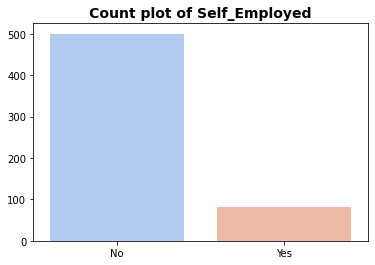

In [19]:
fig = sns.barplot(df['Self_Employed'].value_counts().index,df['Self_Employed'].value_counts().values, palette='coolwarm')
fig.set_title('Count plot of Self_Employed', fontsize=14, fontweight='bold')
plt.show()

In [20]:
df['Self_Employed'].value_counts(normalize=True)*100

No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64

In [21]:
nan = df['Self_Employed'].isna()
length = sum(nan)
replacement = random.choices(['Yes','No'], weights=[0.85,0.15], k=length)
df.loc[nan,'Self_Employed'] = replacement

print(df['Self_Employed'].describe())

count     614
unique      2
top        No
freq      506
Name: Self_Employed, dtype: object


Fill null values of Self Employed column with ratio of 85:15

In [22]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
null_data = df[df['LoanAmount'].isnull()]
null_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,3,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,Male,Yes,3,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,Male,Yes,0,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,Male,No,0,Graduate,Yes,6782,0.0,NaN,360.0,NaN,Urban,N
102,Male,Yes,3,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,Male,Yes,3,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,Female,No,3,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,Male,No,1,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,Male,Yes,1,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [24]:
loan_new = df.dropna().groupby(['Property_Area']).apply(lambda df: round(df['LoanAmount'].mean(), 0))
loan_new

#first we groupby property area and get avg of it

Property_Area
Rural        154.0
Semiurban    146.0
Urban        138.0
dtype: float64

In [25]:
def fill_loanamount(row):
    row['LoanAmount'] = loan_new[row['Property_Area']]
    return row

df[df['LoanAmount'].isna()] = df[df['LoanAmount'].isna()].apply(lambda r: fill_loanamount(r), axis=1)
#fill loanamount null values with avg of loanamount with property area

In [26]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
df['Loan_Amount_Term'].value_counts(normalize=True)*100

360.0    85.333333
180.0     7.333333
480.0     2.500000
300.0     2.166667
84.0      0.666667
240.0     0.666667
120.0     0.500000
36.0      0.333333
60.0      0.333333
12.0      0.166667
Name: Loan_Amount_Term, dtype: float64

In [28]:
null_data = df[df['Loan_Amount_Term'].isnull()]
null_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,Male,Yes,0,Graduate,Yes,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,Male,Yes,3,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,Female,No,3,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,Male,Yes,2,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,Male,Yes,3,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,Male,Yes,3,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,Male,No,2,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [29]:
nan = df['Loan_Amount_Term'].isna()
length = sum(nan)
replacement = random.choices([360.0,180.0,480.0,300.0,84.0,240.0,120.0,36.0,60.0,12.0], weights=[85.333333,7.333,2.500000,2.166667,0.666667,0.666667,0.500000,0.333333,0.333333,0.166667], k=length)
df.loc[nan,'Loan_Amount_Term'] = replacement

print(df['Loan_Amount_Term'].describe())

count    614.000000
mean     341.179153
std       66.558886
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64


In [30]:
df['Loan_Amount_Term'].value_counts(normalize=True)*100

360.0    85.179153
180.0     7.328990
480.0     2.442997
300.0     2.117264
84.0      0.814332
240.0     0.651466
60.0      0.488599
120.0     0.488599
36.0      0.325733
12.0      0.162866
Name: Loan_Amount_Term, dtype: float64

In [31]:
null_data = df[df['Credit_History'].isnull()]
null_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,Male,No,3,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,Male,Yes,3,Graduate,Yes,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,Male,Yes,3,Graduate,Yes,4166,3369.0,201.0,360.0,NaN,Urban,N
42,Male,Yes,2,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,Male,Yes,2,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,Male,Yes,3,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,Male,Yes,0,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,Male,No,0,Graduate,Yes,6782,0.0,138.0,360.0,NaN,Urban,N
117,Male,Yes,3,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,Female,No,3,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


In [32]:
df['Credit_History'].value_counts(normalize=True)*100

1.0    84.219858
0.0    15.780142
Name: Credit_History, dtype: float64

In [33]:
nan = df['Credit_History'].isna()
length = sum(nan)
replacement = random.choices([0.0,1.0], weights=[0.15,0.85], k=length)
df.loc[nan,'Credit_History'] = replacement

print(df['Credit_History'].describe())

count    614.00000
mean       0.84202
std        0.36502
min        0.00000
25%        1.00000
50%        1.00000
75%        1.00000
max        1.00000
Name: Credit_History, dtype: float64


In [34]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

NOW IT IS CLEAR FOR PRE_PROCESSING DATA

In [35]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [36]:
df['Total_Income'] = df['ApplicantIncome']+df['CoapplicantIncome']
df['Loan_Amount_Term'] = df['Loan_Amount_Term']/30
df['EMI'] = df['LoanAmount']/df['Loan_Amount_Term']

#create three new column

In [37]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI
609,Female,No,0,Graduate,No,2900,0.0,71.0,12.0,1.0,Rural,Y,2900.0,5.916667
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,6.0,1.0,Rural,Y,4106.0,6.666667
611,Male,Yes,3,Graduate,No,8072,240.0,253.0,12.0,1.0,Urban,Y,8312.0,21.083333
612,Male,Yes,3,Graduate,No,7583,0.0,187.0,12.0,1.0,Urban,Y,7583.0,15.583333
613,Female,No,3,Graduate,Yes,4583,0.0,133.0,12.0,0.0,Semiurban,N,4583.0,11.083333


In [38]:
df.drop(['ApplicantIncome','CoapplicantIncome'], inplace = True, axis = 1)

In [39]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI
0,Male,No,3,Graduate,No,138.0,12.0,1.0,Urban,Y,5849.0,11.500000
1,Male,Yes,3,Graduate,No,128.0,12.0,1.0,Rural,N,6091.0,10.666667
2,Male,Yes,3,Graduate,Yes,66.0,12.0,1.0,Urban,Y,3000.0,5.500000
3,Male,Yes,3,Not Graduate,No,120.0,12.0,1.0,Urban,Y,4941.0,10.000000
4,Male,No,3,Graduate,No,141.0,12.0,1.0,Urban,Y,6000.0,11.750000


In [40]:
avg_inc_ = df.groupby(['Loan_Status']).apply(lambda df: round(df['EMI'].mean(), 0))
avg_inc_

Loan_Status
N    15.0
Y    14.0
dtype: float64

In [41]:
avg_inc_2 = df.groupby(['Property_Area','Loan_Status']).apply(lambda df: round(df['Loan_Status'].count(), 0))
avg_inc_2

Property_Area  Loan_Status
Rural          N               69
               Y              110
Semiurban      N               54
               Y              179
Urban          N               69
               Y              133
dtype: int64

In [42]:
print('Rural Loan approvel ratio' , (100*110)/169)
print('Semiurban Loan approvel ratio' , (100*179)/233)
print('Urban loan approvel ratio' , (100*133)/202)

Rural Loan approvel ratio 65.08875739644971
Semiurban Loan approvel ratio 76.82403433476395
Urban loan approvel ratio 65.84158415841584


We can see that loan approvel ratio is high in semi-urban area

while it is low in rural area

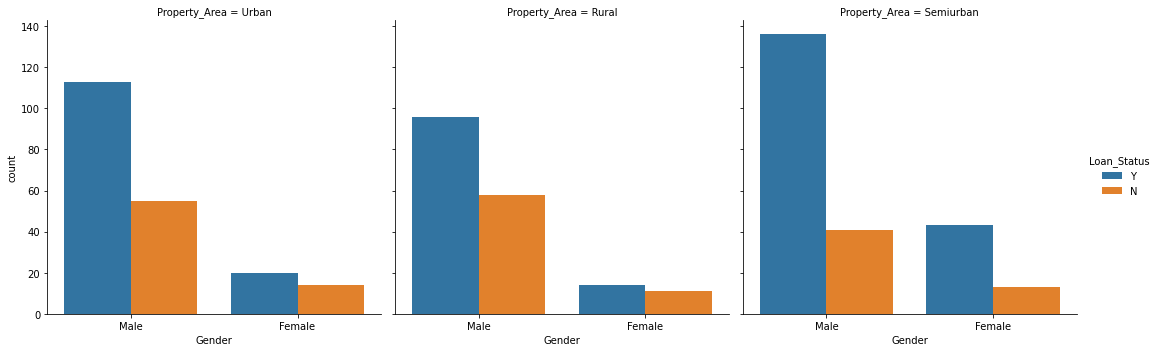

In [43]:
sns.catplot(x ='Gender', hue ='Loan_Status',
kind ='count', col ='Property_Area', data = df)

1)Male applicant have higher chances to get loan approved

2)In Urban& Rural if applicant is Female then there is 40 to 50% chances of Rejection

3) Male appilcant from Semiurban area have higher chances to get loan approvel

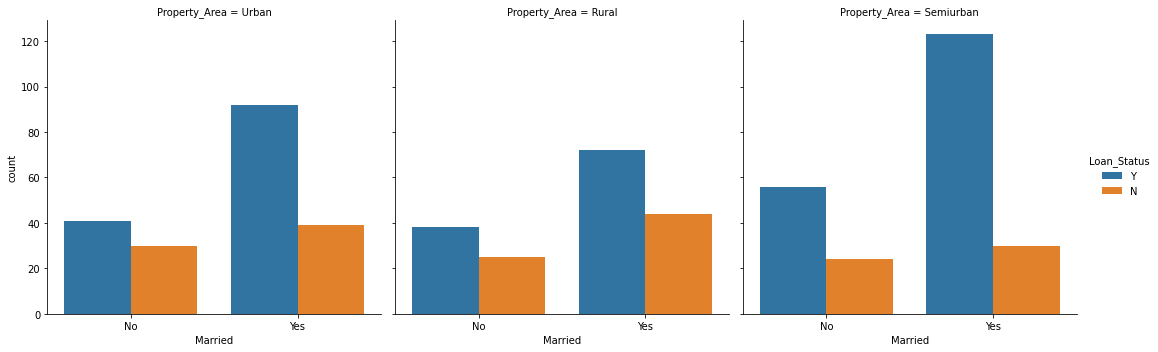

In [44]:
sns.catplot(x ='Married', hue ='Loan_Status',
kind ='count', col ='Property_Area', data = df)

1) Married applicant have higher chances for loan approvel

2) Unmarried applicant from Urban area have higher chances to loan approvel rejection

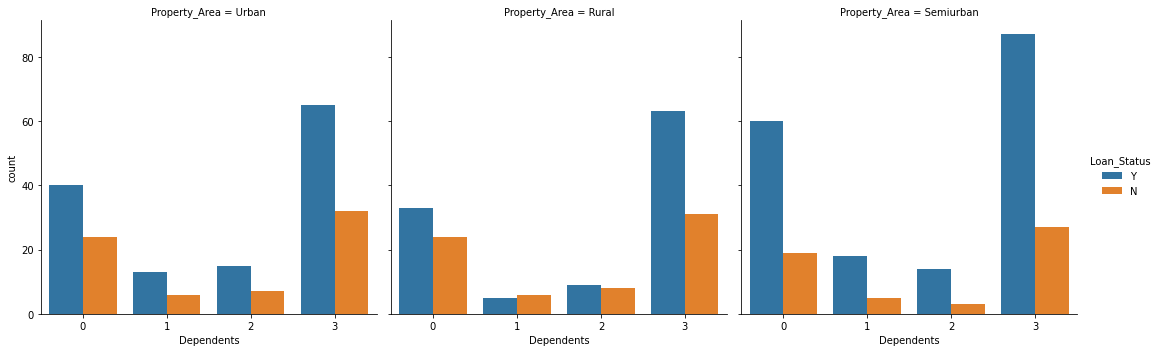

In [45]:
sns.catplot(x ='Dependents', hue ='Loan_Status',
kind ='count', col ='Property_Area', data = df)

1) If applicant have 3 or more then 3 dependents then higher chances to loan approvel rejection

2) If applicant have 0 or 1 child then have good chances for loan approvel

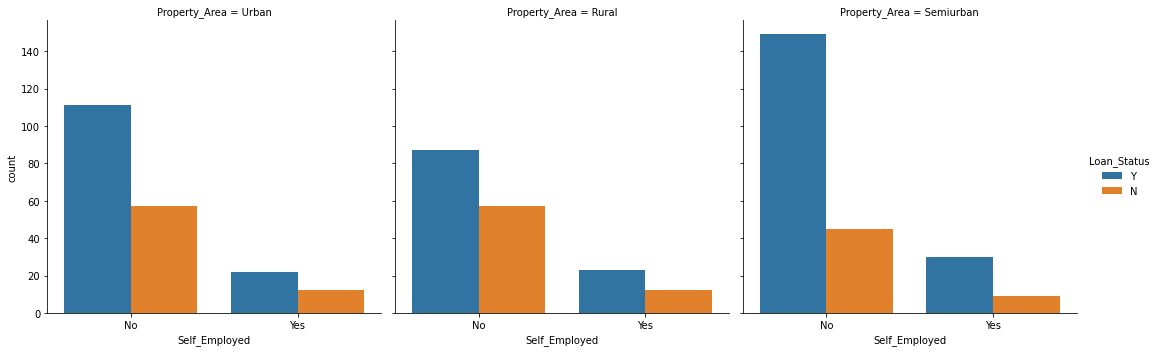

In [46]:
sns.catplot(x ='Self_Employed', hue ='Loan_Status',
kind ='count', col ='Property_Area', data = df)

1) Selleried applicant have higher chances to get loan approvel in urban and semi-urban area


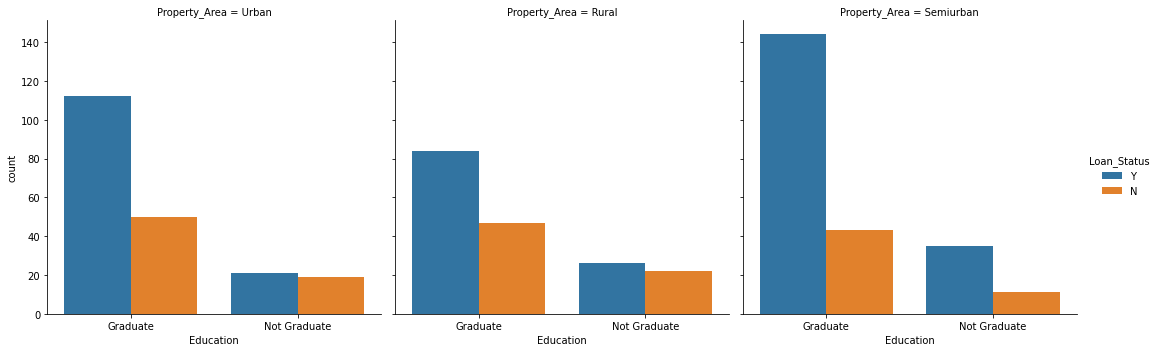

In [47]:
sns.catplot(x ='Education', hue ='Loan_Status',
kind ='count', col ='Property_Area', data = df)

1)Non-graduate applicant from urban area have higher chances for loan rejection

2) Graduate applicant have good chances for loan approval

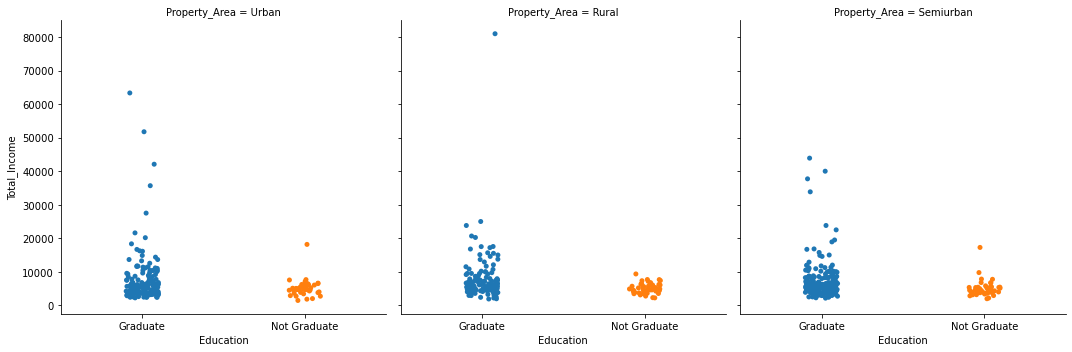

In [48]:
sns.catplot(x ='Education',y ='Total_Income', col ='Property_Area', data = df)

In urban:

        Graduate people have high income compare to non-graduate
        
In rural:

        Graduate people have high income compare to non-graduate
        
In semiurban:

        Graduate people have high income compare to non-graduate

In short we can say that, Graduate people have higher income
    

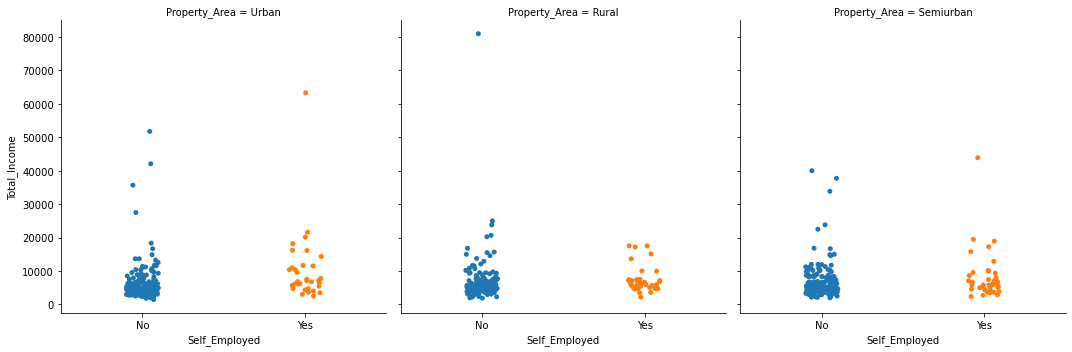

In [49]:
sns.catplot(x ='Self_Employed',y ='Total_Income', col ='Property_Area', data = df)

In urban:

        Self-employed people have lower income compared to salaried person
        
In rural:

        Self-employed people have lower income compared to salaried person
        
In semiurban:

        Self-employed people have lower income compared to salaried person

In short we can say that, salaried people have higher income
    

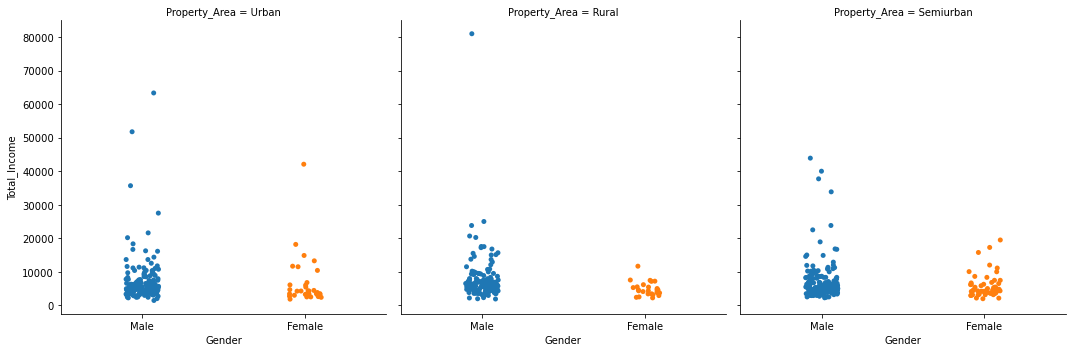

In [50]:
sns.catplot(x ='Gender',y ='Total_Income', col ='Property_Area', data = df)

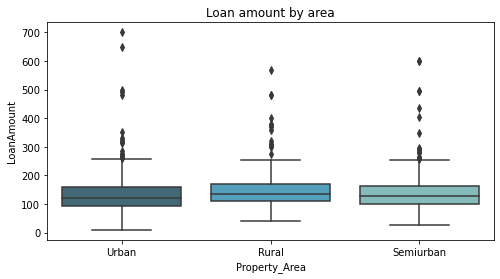

In [51]:
plt.figure(figsize = (8,4))
sns.boxplot(x = 'Property_Area', y = 'LoanAmount', data = df, palette= 'GnBu_d').set_title('Loan amount by area')
plt.show()

average of loan amount is quite higher in Rural area and it lower in urban area

In [52]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Total_Income', 'EMI'],
      dtype='object')

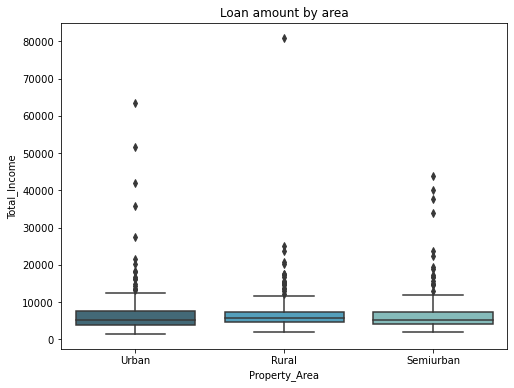

In [53]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'Property_Area', y = 'Total_Income', data = df, palette= 'GnBu_d').set_title('Loan amount by area')
plt.show()

Total income is higher in urban area

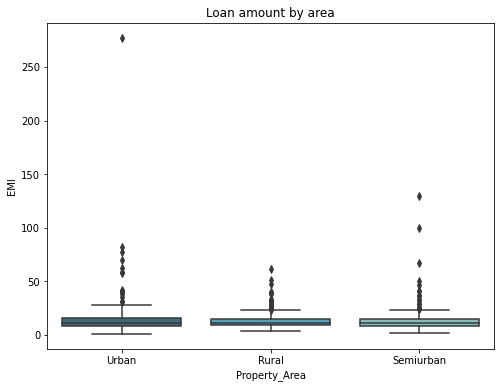

In [54]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'Property_Area', y = 'EMI', data = df, palette= 'GnBu_d').set_title('Loan amount by area')
plt.show()

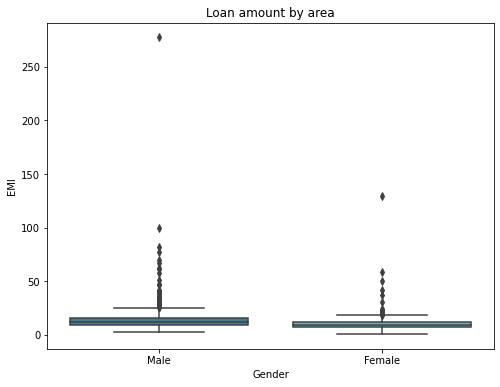

In [55]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'Gender', y = 'EMI', data = df, palette= 'GnBu_d').set_title('Loan amount by area')
plt.show()

In [56]:
le = LabelEncoder()
df["Gender"]= le.fit_transform(df["Gender"])
df["Married"]= le.fit_transform(df["Married"])
df["Dependents"]= le.fit_transform(df["Dependents"])
df["Education"]= le.fit_transform(df["Education"])
df["Self_Employed"]= le.fit_transform(df["Self_Employed"])
df["Property_Area"]= le.fit_transform(df["Property_Area"])
df["Loan_Status"]= le.fit_transform(df["Loan_Status"])

In [57]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI
0,1,0,3,0,0,138.0,12.0,1.0,2,1,5849.0,11.500000
1,1,1,3,0,0,128.0,12.0,1.0,0,0,6091.0,10.666667
2,1,1,3,0,1,66.0,12.0,1.0,2,1,3000.0,5.500000
3,1,1,3,1,0,120.0,12.0,1.0,2,1,4941.0,10.000000
4,1,0,3,0,0,141.0,12.0,1.0,2,1,6000.0,11.750000


In [58]:
df.dtypes

Gender                int32
Married               int32
Dependents            int32
Education             int32
Self_Employed         int32
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area         int32
Loan_Status           int32
Total_Income        float64
EMI                 float64
dtype: object

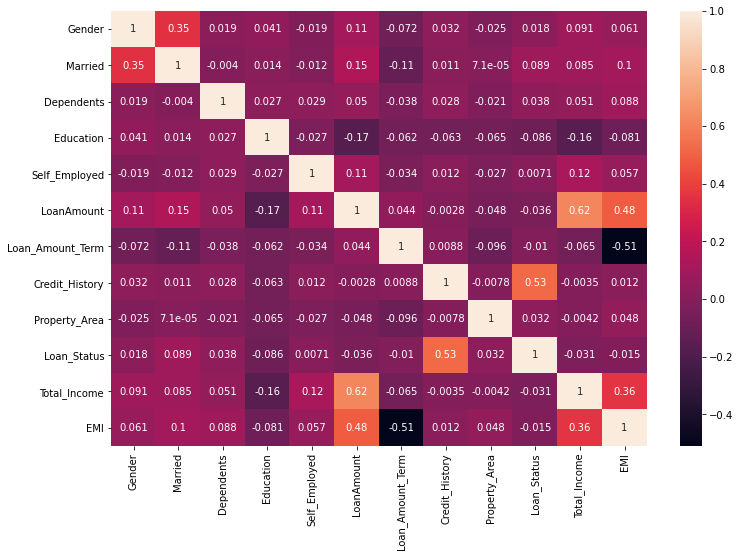

In [59]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot = True,linecolor="black")

#### Loan amount is highly related with total income
#### EMI is as natural related with loan amount
#### credit history is much important for loan status
#### total income and emi have relation with each other


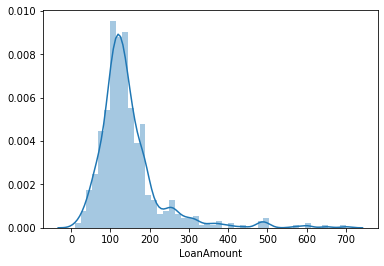

In [60]:
sns.distplot(df['LoanAmount'])
#Right Skewed

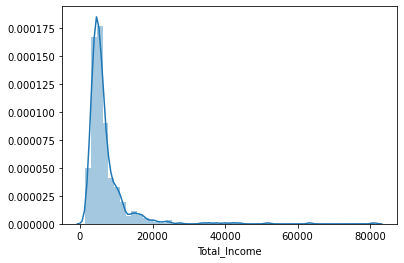

In [61]:
sns.distplot(df['Total_Income'])
#Right Skewed

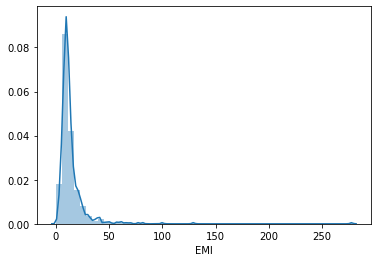

In [62]:
sns.distplot(df['EMI'])
#Right Skewed

In [63]:
df.skew()

Gender             -1.606923
Married            -0.637293
Dependents         -0.348700
Education           1.367622
Self_Employed       1.706707
LoanAmount          2.728394
Loan_Amount_Term   -2.367755
Credit_History     -1.880101
Property_Area      -0.066196
Loan_Status        -0.809998
Total_Income        5.633449
EMI                 9.744004
dtype: float64

In [64]:
from scipy.stats import zscore

#di=df.columns
z_score=zscore(df)
print(df.shape)
df_1=df.loc[(z_score<3).all(axis=1)]
print(df_1.shape)

(614, 12)
(587, 12)


Remove outliers using z-score technique

In [65]:
df_1.skew()

Gender             -1.591988
Married            -0.634128
Dependents         -0.300103
Education           1.321362
Self_Employed       1.758160
LoanAmount          1.155496
Loan_Amount_Term   -2.276335
Credit_History     -1.858222
Property_Area      -0.057282
Loan_Status        -0.832132
Total_Income        2.057747
EMI                 2.162820
dtype: float64

In [66]:
from scipy.stats import boxcox

for col in df_1:
    if df_1[col].skew()>=0.9:
        df_1[col]=np.cbrt(df_1[col]) 
    if df_1[col].skew()<= -.6:
        df_1[col]=np.power(df_1[col],2)
        
#remove skewness using cuberoot and power transformation

In [67]:
df_1.skew()

Gender             -1.591988
Married            -0.634128
Dependents         -0.300103
Education           1.321362
Self_Employed       1.758160
LoanAmount         -0.034334
Loan_Amount_Term   -1.142807
Credit_History     -1.858222
Property_Area      -0.057282
Loan_Status        -0.832132
Total_Income        0.944238
EMI                 0.598638
dtype: float64

In [68]:
x =df_1.drop('Loan_Status',axis=1)
y =df_1['Loan_Status']

In [69]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
std.fit_transform(x)

array([[ 4.82900898e-01, -1.36506946e+00,  9.41008240e-01, ...,
         1.22814328e+00,  4.77045970e-02, -1.44741609e-03],
       [ 4.82900898e-01,  7.32563454e-01,  9.41008240e-01, ...,
        -1.31030779e+00,  1.33340076e-01, -1.56325534e-01],
       [ 4.82900898e-01,  7.32563454e-01,  9.41008240e-01, ...,
         1.22814328e+00, -1.20814873e+00, -1.36475824e+00],
       ...,
       [ 4.82900898e-01,  7.32563454e-01,  9.41008240e-01, ...,
         1.22814328e+00,  8.29943297e-01,  1.39895361e+00],
       [ 4.82900898e-01,  7.32563454e-01,  9.41008240e-01, ...,
         1.22814328e+00,  6.16705252e-01,  6.65230578e-01],
       [-2.07081827e+00, -1.36506946e+00,  9.41008240e-01, ...,
        -4.10822574e-02, -4.43793265e-01, -7.79158067e-02]])

After scalling the data our data is ready for model creation

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,EMI
364,1,0,1,0.0,1.0,5.204828,144.0,1.0,0,18.965774,2.273418
199,1,0,3,0.0,1.0,4.362071,144.0,1.0,2,22.239801,1.905310
447,1,1,0,0.0,1.0,3.802952,144.0,1.0,0,17.002306,1.661092
97,1,1,0,0.0,0.0,3.684031,144.0,1.0,1,14.380710,1.609149
367,1,0,2,0.0,0.0,4.986631,144.0,0.0,0,17.239965,2.178112


In [71]:
dtc=DecisionTreeClassifier()
svc=SVC()
l_svc = LinearSVC()
kn=KNeighborsClassifier(n_neighbors=5)
gb = GaussianNB()
sgd = SGDClassifier()
rf = RandomForestClassifier(n_estimators=100)



In [72]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

In [73]:
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    svc.fit(x_train,y_train)
    pred_test=svc.predict(x_test)
    pred_train=svc.predict(x_train)
    if round(accuracy_score(y_test,pred_test)*100,2)==round(accuracy_score(y_train,pred_train)*100,2):
        print('Random state',i,'Score is well')
        print('test accuracy score',accuracy_score(y_test,pred_test)*100)
        print('train accuracy score',accuracy_score(y_train,pred_train)*100)

In [74]:
param={'criterion':['gini', 'entropy'],'splitter':['best', 'random'],'max_features':['none','auto','sqrt','log2']}

In [75]:
gd=GridSearchCV(dtc,param)
gd.fit(x,y)
print(gd.best_score_)
print(gd.best_params_)

0.7188758510792409
{'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}


In [76]:
svc=SVC()
svcp=SVC(kernel='poly')
svcl=SVC(kernel='linear')
dtc=DecisionTreeClassifier(criterion='entropy',splitter='best',max_features='sqrt')
gb = GaussianNB()
knn=KNeighborsClassifier(n_neighbors=5)
lg=LogisticRegression()

In [77]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Score',f.score(x_train,y_train))
    print('Accuracy Score\n',accuracy_score(y_test,pred))
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report',classification_report(y_test,pred))
    print('f1_score',f1_score(y_test,pred))

In [78]:
fun(svc)

Score 0.6929637526652452
Accuracy Score
 0.7203389830508474
Confusion Matrix
 [[ 2 32]
 [ 1 83]]
Classification Report               precision    recall  f1-score   support

           0       0.67      0.06      0.11        34
           1       0.72      0.99      0.83        84

    accuracy                           0.72       118
   macro avg       0.69      0.52      0.47       118
weighted avg       0.71      0.72      0.62       118

f1_score 0.8341708542713568


In [79]:
fun(svcp)

Score 0.6865671641791045
Accuracy Score
 0.711864406779661
Confusion Matrix
 [[ 0 34]
 [ 0 84]]
Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.71      1.00      0.83        84

    accuracy                           0.71       118
   macro avg       0.36      0.50      0.42       118
weighted avg       0.51      0.71      0.59       118

f1_score 0.8316831683168318


In [80]:
fun(dtc)

Score 1.0
Accuracy Score
 0.7457627118644068
Confusion Matrix
 [[17 17]
 [13 71]]
Classification Report               precision    recall  f1-score   support

           0       0.57      0.50      0.53        34
           1       0.81      0.85      0.83        84

    accuracy                           0.75       118
   macro avg       0.69      0.67      0.68       118
weighted avg       0.74      0.75      0.74       118

f1_score 0.8255813953488372


In [81]:
fun(knn)

Score 0.7803837953091685
Accuracy Score
 0.7203389830508474
Confusion Matrix
 [[ 8 26]
 [ 7 77]]
Classification Report               precision    recall  f1-score   support

           0       0.53      0.24      0.33        34
           1       0.75      0.92      0.82        84

    accuracy                           0.72       118
   macro avg       0.64      0.58      0.58       118
weighted avg       0.69      0.72      0.68       118

f1_score 0.8235294117647058


In [82]:
fun(lg)

Score 0.8102345415778252
Accuracy Score
 0.8305084745762712
Confusion Matrix
 [[15 19]
 [ 1 83]]
Classification Report               precision    recall  f1-score   support

           0       0.94      0.44      0.60        34
           1       0.81      0.99      0.89        84

    accuracy                           0.83       118
   macro avg       0.88      0.71      0.75       118
weighted avg       0.85      0.83      0.81       118

f1_score 0.8924731182795699


In [83]:
rfc=RandomForestClassifier(n_estimators=50,random_state=42)

In [84]:
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print('Score',rfc.score(x_train,y_train))
print('Accuracy Score\n',accuracy_score(y_test,pred))
print('Confusion Matrix\n',confusion_matrix(y_test,pred))
print('Classification Report',classification_report(y_test,pred))
print("f1 score",f1_score(y_test,pred))

Score 1.0
Accuracy Score
 0.8220338983050848
Confusion Matrix
 [[17 17]
 [ 4 80]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.50      0.62        34
           1       0.82      0.95      0.88        84

    accuracy                           0.82       118
   macro avg       0.82      0.73      0.75       118
weighted avg       0.82      0.82      0.81       118

f1 score 0.883977900552486


In [85]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [86]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Score',ad.score(x_train,y_train))
print('Accuracy Score\n',accuracy_score(y_test,predad))
print('Confusion Matrix\n',confusion_matrix(y_test,predad))
print('Classification Report',classification_report(y_test,predad))
print("f1 score",f1_score(y_test,pred))

Score 0.8486140724946695
Accuracy Score
 0.7966101694915254
Confusion Matrix
 [[16 18]
 [ 6 78]]
Classification Report               precision    recall  f1-score   support

           0       0.73      0.47      0.57        34
           1       0.81      0.93      0.87        84

    accuracy                           0.80       118
   macro avg       0.77      0.70      0.72       118
weighted avg       0.79      0.80      0.78       118

f1 score 0.883977900552486


In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [88]:
score=cross_val_score(svc,x,y,cv=10)
print(score.mean())

0.6983927527761543


In [89]:
score=cross_val_score(svcp,x,y,cv=10)
print(score.mean())

0.6881940385739334


In [90]:
score=cross_val_score(svcp,x,y,cv=10)
print(score.mean())

0.6881940385739334


In [91]:
score=cross_val_score(dtc,x,y,cv=10)
print(score.mean())

0.6882524839275278


In [92]:
score=cross_val_score(knn,x,y,cv=14)
print(score.mean())

0.7122117139538743


In [93]:
score=cross_val_score(rfc,x,y,cv=14)
print(score.mean())

0.7905674464907915


In [94]:
score=cross_val_score(lg,x,y,cv=10)
print(score.mean())

0.8144944476914086


In [95]:
score=cross_val_score(ad,x,y,cv=10)
print(score.mean())

0.8008474576271187


In [96]:
sd=pd.DataFrame({'column name':['svc','svcp','dtc','knn','rfc','ada','Log']})

In [97]:
sd['score']=[0.69,0.68,1.0,0.76,1.0,0.85,0.80]
sd['Accuracy Score']=[0.72,0.71,0.73,0.72,0.83,0.82,0.83]
sd['F1 Score']=[0.83,0.83,0.82,0.83,0.88,0.88,0.89]
sd['CV Score']=[0.69,0.68,0.67,0.69,0.77,0.78,0.80]

In [98]:
sd

,column name,score,Accuracy Score,F1 Score,CV Score
0,svc,0.69,0.72,0.83,0.69
1,svcp,0.68,0.71,0.83,0.68
2,dtc,1.00,0.73,0.82,0.67
3,knn,0.76,0.72,0.83,0.69
4,rfc,1.00,0.83,0.88,0.77
5,ada,0.85,0.82,0.88,0.78
6,Log,0.80,0.83,0.89,0.80


FROM ABOVE LIST WE CAN SEE THAT RFC have good accuracy score as well as F1 score also 

In [99]:
import pickle
filename='loan.pkl'
pickle.dump(rfc,open(filename,'wb'))

     Actual  Predict
400       0        0
582       1        1
10        1        1
343       1        1
557       1        1
..      ...      ...
104       1        1
217       1        1
272       1        1
584       0        0
17        0        0

[118 rows x 2 columns]


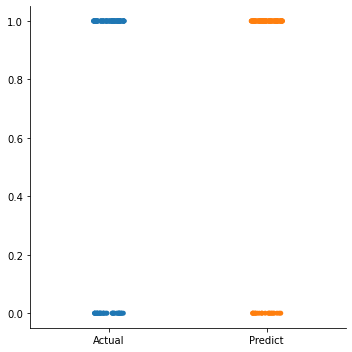

In [100]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=rfc.predict(x_test)

print(res)
sns.catplot(data=res)